In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [18]:
m = MinMaxScaler()

In [24]:
df1 =pd.DataFrame(m.fit_transform(df[['petal length (cm)','petal width (cm)']]),columns=['petal length (cm)','petal width (cm)'])
df1

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [39]:
km = KMeans(n_clusters = 3)
df1['cluster']=km.fit_predict(df1)
df1

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,0


In [40]:
c0 = df1[df.cluster==0]
c1 = df1[df.cluster==1]
c2 = df1[df.cluster==2]

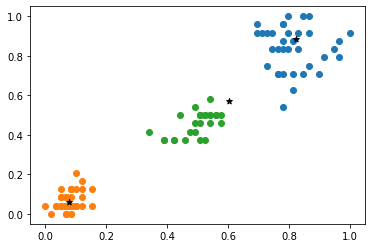

In [41]:
plt.scatter(c0['petal length (cm)'],c0['petal width (cm)'])
plt.scatter(c1['petal length (cm)'],c1['petal width (cm)'])
plt.scatter(c2['petal length (cm)'],c2['petal width (cm)'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color= 'black')

C:\Users\Karthik Murali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


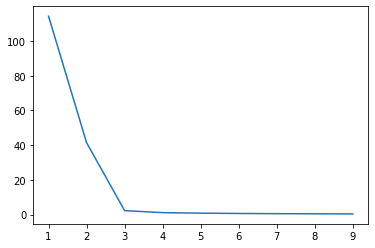

In [44]:
k_rng = range(1,10)
sse = list()
for i in k_rng:
    km1= KMeans(n_clusters=i)
    km1.fit_predict(df1)
    sse.append(km1.inertia_)
plt.plot(k_rng,sse)